In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
%matplotlib inline



## Loading the Covid-19 Data  

In [2]:
df = pd.read_csv("johns-hopkins-covid-19-daily-dashboard-cases-over-time.csv") # Importing the dataset
df


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,country_region,last_update,confirmed,deaths,recovered,active,delta_confirmed,delta_recovered,incident_rate,people_tested,people_hospitalized,province_state,fips,uid,iso3,report_date_string
0,Afghanistan,2020-01-22,0,0,NaN,NaN,0.0,NaN,0.000000,NaN,NaN,NaN,NaN,4,AFG,2020-01-22
1,Afghanistan,2020-01-23,0,0,NaN,NaN,0.0,NaN,0.000000,NaN,NaN,NaN,NaN,4,AFG,2020-01-23
2,Afghanistan,2020-01-24,0,0,NaN,NaN,0.0,NaN,0.000000,NaN,NaN,NaN,NaN,4,AFG,2020-01-24
3,Afghanistan,2020-01-25,0,0,NaN,NaN,0.0,NaN,0.000000,NaN,NaN,NaN,NaN,4,AFG,2020-01-25
4,Afghanistan,2020-01-26,0,0,NaN,NaN,0.0,NaN,0.000000,NaN,NaN,NaN,NaN,4,AFG,2020-01-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44029,US,2020-07-14,1950,22,NaN,NaN,47.0,NaN,28150.714595,NaN,NaN,Wyoming,56.0,84000056,USA,2020-07-14
44030,US,2020-07-15,1985,22,NaN,NaN,35.0,NaN,28655.983831,NaN,NaN,Wyoming,56.0,84000056,USA,2020-07-15
44031,US,2020-07-16,2026,24,NaN,NaN,41.0,NaN,29247.870651,NaN,NaN,Wyoming,56.0,84000056,USA,2020-07-16
44032,US,2020-07-17,2069,24,NaN,NaN,43.0,NaN,29868.629999,NaN,NaN,Wyoming,56.0,84000056,USA,2020-07-17


## Filtering Data Country wise 

In [32]:
CNT='India'
new_df = df[df['country_region']==CNT]
new_df


,country_region,last_update,confirmed,deaths,recovered,active,delta_confirmed,delta_recovered,incident_rate,people_tested,people_hospitalized,province_state,fips,uid,iso3,report_date_string
14141,India,2020-01-22,0,0,NaN,NaN,0.0,NaN,0.000000,NaN,NaN,NaN,NaN,356,IND,2020-01-22
14142,India,2020-01-23,0,0,NaN,NaN,0.0,NaN,0.000000,NaN,NaN,NaN,NaN,356,IND,2020-01-23
14143,India,2020-01-24,0,0,NaN,NaN,0.0,NaN,0.000000,NaN,NaN,NaN,NaN,356,IND,2020-01-24
14144,India,2020-01-25,0,0,NaN,NaN,0.0,NaN,0.000000,NaN,NaN,NaN,NaN,356,IND,2020-01-25
14145,India,2020-01-26,0,0,NaN,NaN,0.0,NaN,0.000000,NaN,NaN,NaN,NaN,356,IND,2020-01-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14315,India,2020-07-14,936181,24309,NaN,NaN,29429.0,NaN,67.838987,NaN,NaN,NaN,NaN,356,IND,2020-07-14
14316,India,2020-07-15,968857,24914,NaN,NaN,32676.0,NaN,70.206806,NaN,NaN,NaN,NaN,356,IND,2020-07-15
14317,India,2020-07-16,1003832,25602,NaN,NaN,34975.0,NaN,72.741218,NaN,NaN,NaN,NaN,356,IND,2020-07-16
14318,India,2020-07-17,1039084,26273,NaN,NaN,35252.0,NaN,75.295703,NaN,NaN,NaN,NaN,356,IND,2020-07-17


## Preparing the data

In [33]:
new_df = new_df[['last_update', 'confirmed','delta_confirmed']]
new_df['Days'] = np.arange(len(new_df))
new_df

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,last_update,confirmed,delta_confirmed,Days
14141,2020-01-22,0,0.0,0
14142,2020-01-23,0,0.0,1
14143,2020-01-24,0,0.0,2
14144,2020-01-25,0,0.0,3
14145,2020-01-26,0,0.0,4
...,...,...,...,...
14315,2020-07-14,936181,29429.0,174
14316,2020-07-15,968857,32676.0,175
14317,2020-07-16,1003832,34975.0,176
14318,2020-07-17,1039084,35252.0,177


## Data Visualization

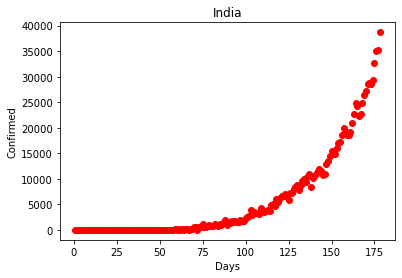

In [35]:
X = np.array(new_df[['Days']])
X=X[1:]
y = np.array(new_df[['delta_confirmed']])
y=y[1:]
plt.scatter(X,y,color="red") # Plot a graph X vs y
plt.title(CNT)
plt.xlabel('Days')
plt.ylabel('Confirmed')
plt.show()

## Regression: Training of the Data

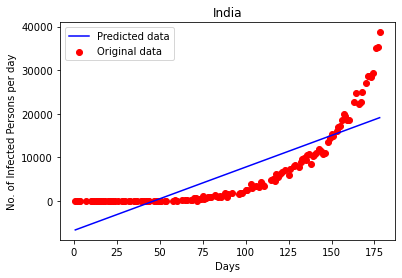

In [38]:
# test_size=0.2: we will split our dataset (10 observations) into 2 parts (training set, test set) and the ratio of 
# test set compare to dataset is 0.2 (2 observations will be put into the test set. You can put it 1/5 to get 20% or 
# 0.2, they are the same. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree =1)
X_poly = poly_features.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X_train, y_train, color='red', label='Original data')
    plt.plot(X, poly_model.predict(poly_features.fit_transform(X)), color='blue',label='Predicted data')
    plt.legend()
    plt.title(CNT)
    plt.xlabel('Days')
    plt.ylabel('No. of Infected Persons per day')
 #   plt.savefig(CNT, format='eps',dpi=1600)
 #  import os
 #   thisFile = CNT
 #   base = os.path.splitext(thisFile)[0]
 #   os.rename(thisFile, base + ".eps") 
 #   plt.show()
   
 #  return

viz_polymonial()
from array import *
import math

#sample = open('India.txt', 'w') 


## Predictions using the trained model

In [37]:
for i in range(100,225,2):
    predi=np.reshape(i,(-1,1))
    print("{}\n".format(poly_model.predict(poly_features.fit_transform(predi))))
   # print(a,file =sample)
    #np.savetxt('1.csv',a)
    
# predicting on training data-set
y_train_predicted = poly_model.predict(X_poly)

# predicting on test data-set
y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  
# evaluating the model on training dataset
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
r2_train = r2_score(y_train, y_train_predicted)
  
# evaluating the model on test dataset
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
r2_test = r2_score(y_test, y_test_predict)
  
#print("The model performance for the training set")
#print("-------------------------------------------")
print(" {}\n".format(rmse_train))
print("{}\n".format(r2_train))
  
#print("\n")
  
#print("The model performance for the test set")
#print("-------------------------------------------")
print("{}\n".format(rmse_test))
print("{}".format(r2_test))


[[2506.21904666]]

[[2704.95600756]]

[[2918.25423142]]

[[3147.19563568]]

[[3392.90809479]]

[[3656.56544014]]

[[3939.3874601]]

[[4242.6399]]

[[4567.63446214]]

[[4915.72880579]]

[[5288.32654717]]

[[5686.8772595]]

[[6112.87647293]]

[[6567.8656746]]

[[7053.43230862]]

[[7571.20977604]]

[[8122.87743492]]

[[8710.16060024]]

[[9334.83054398]]

[[9998.70449508]]

[[10703.64563944]]

[[11451.56311992]]

[[12244.41203638]]

[[13084.19344561]]

[[13972.95436138]]

[[14912.78775443]]

[[15905.83255248]]

[[16954.27364019]]

[[18060.3418592]]

[[19226.31400811]]

[[20454.51284251]]

[[21747.30707494]]

[[23107.1113749]]

[[24536.38636886]]

[[26037.63864027]]

[[27613.42072955]]

[[29266.33113405]]

[[30999.01430814]]

[[32814.16066311]]

[[34714.50656726]]

[[36702.83434581]]

[[38781.97228098]]

[[40954.79461195]]

[[43224.22153487]]

[[45593.21920284]]

[[48064.79972596]]

[[50642.02117125]]

[[53327.98756275]]

[[56125.84888142]]

[[59038.80106522]]

[[62070.08600906]]

[[65222.9

In [14]:
# predicting on training data-set
y_train_predicted = poly_model.predict(X_poly)

# predicting on test data-set
y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  
# evaluating the model on training dataset
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
r2_train = r2_score(y_train, y_train_predicted)
  
# evaluating the model on test dataset
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
r2_test = r2_score(y_test, y_test_predict)
  
print("The model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))
  
print("\n")
  
print("The model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

The model performance for the training set
-------------------------------------------
RMSE of training set is 1009.3128524210158
R2 score of training set is 0.9885157330453941


The model performance for the test set
-------------------------------------------
RMSE of test set is 695.0258682980583
R2 score of test set is 0.9945855525952259
